In [1]:
from fastai.vision.all import *

ImportError: cannot import name 'is_exact_shape_match' from 'pandas.core.indexers' (/home/nex/mambaforge/lib/python3.10/site-packages/pandas/core/indexers/__init__.py)

In [2]:
path=untar_data(URLs.CAMVID_TINY)

In [3]:
path.ls()

(#4) [Path('/home/nex/.fastai/data/camvid_tiny/labels'),Path('/home/nex/.fastai/data/camvid_tiny/codes.txt'),Path('/home/nex/.fastai/data/camvid_tiny/images'),Path('/home/nex/.fastai/data/camvid_tiny/models')]

In [4]:
codes = np.loadtxt(path/'codes.txt', dtype=str)

In [5]:
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [8]:
fnames = get_image_files(path/"images")

In [9]:
fnames[0]

Path('/home/nex/.fastai/data/camvid_tiny/images/0016E5_02250.png')

In [10]:
def label_func(fn): return path/"labels"/f"{fn.stem}_P{fn.suffix}"

In [12]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = fnames, label_func = label_func, codes = codes)

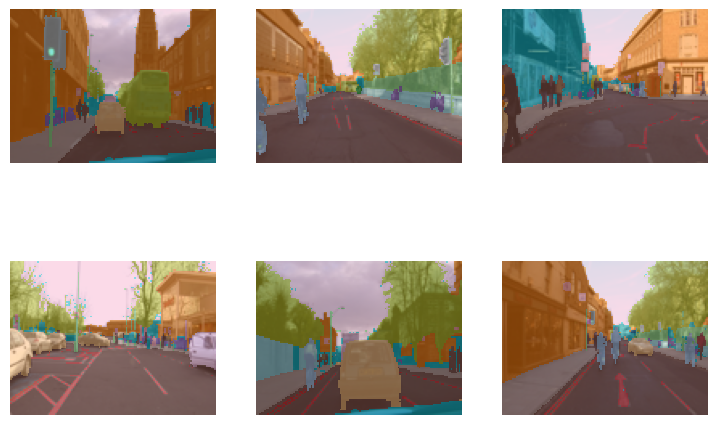

In [13]:
dls.show_batch(max_n=6)

In [15]:
learn = unet_learner(dls, resnet34)

/home/nex/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/nex/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [16]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,time
0,3.449332,2.576034,00:12


epoch,train_loss,valid_loss,time
0,1.968824,1.673648,00:13
1,1.699664,1.365579,00:14
2,1.514522,1.160111,00:13
3,1.364514,1.056855,00:13
4,1.248627,1.034090,00:13


epoch,train_loss,valid_loss,time
0,0.684796,1.309007,00:02


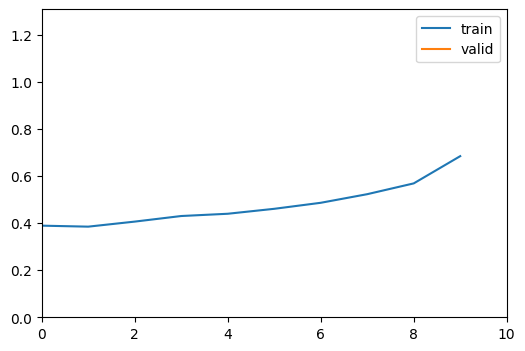

epoch,train_loss,valid_loss,time
0,0.745531,0.749517,00:02
1,0.623586,0.668976,00:02
2,0.556634,0.684702,00:02
3,0.512326,0.714806,00:02
4,0.504565,0.694941,00:02
5,0.497529,0.655569,00:02
6,0.478392,0.689404,00:02
7,0.454187,0.628324,00:02
8,0.427904,0.638486,00:02
9,0.404019,0.661123,00:02


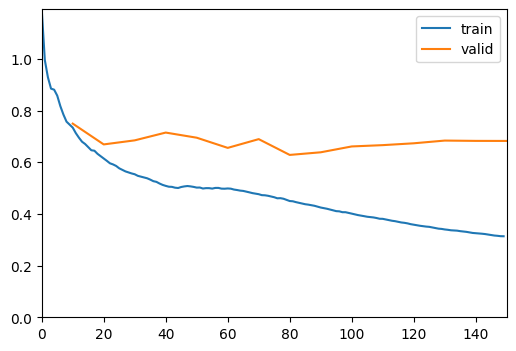

In [32]:
learn2.fine_tune(15, cbs=[ShowGraphCallback()])

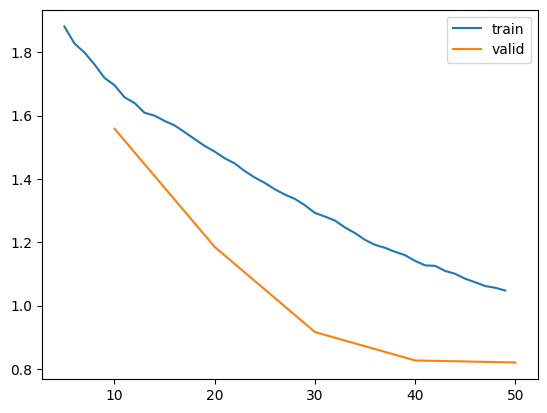

In [21]:
learn2.recorder.plot_loss()

epoch,train_loss,valid_loss,time
0,1.764024,1.817663,00:02
1,1.764889,1.816501,00:02
2,1.764629,1.814281,00:02
3,1.763577,1.811691,00:02
4,1.761874,1.810633,00:02
5,1.760665,1.800901,00:02
6,1.759666,1.792974,00:02
7,1.757164,1.786111,00:02
8,1.755972,1.783530,00:02
9,1.753931,1.800285,00:02


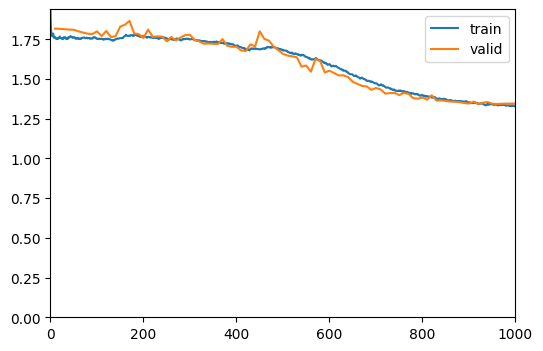

In [26]:
learn.fit_one_cycle(100, slice(5e-3,5e-2), cbs=[ShowGraphCallback()])

epoch,train_loss,valid_loss,time
0,1.328083,1.345806,00:02
1,1.326666,1.345545,00:02
2,1.326337,1.345407,00:02
3,1.325389,1.344966,00:02
4,1.324905,1.344945,00:02
5,1.325313,1.345295,00:02
6,1.325421,1.345210,00:02
7,1.325158,1.344773,00:02
8,1.325172,1.345101,00:02
9,1.325445,1.344206,00:02


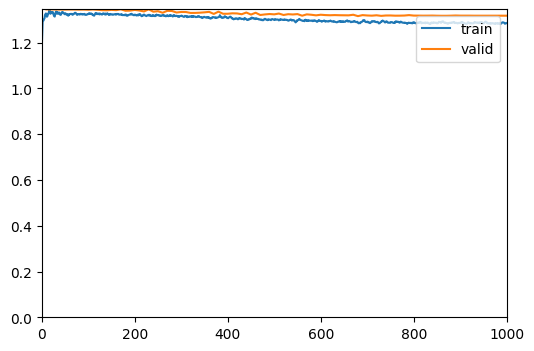

In [28]:
learn.fit_one_cycle(100, cbs=[ShowGraphCallback()])

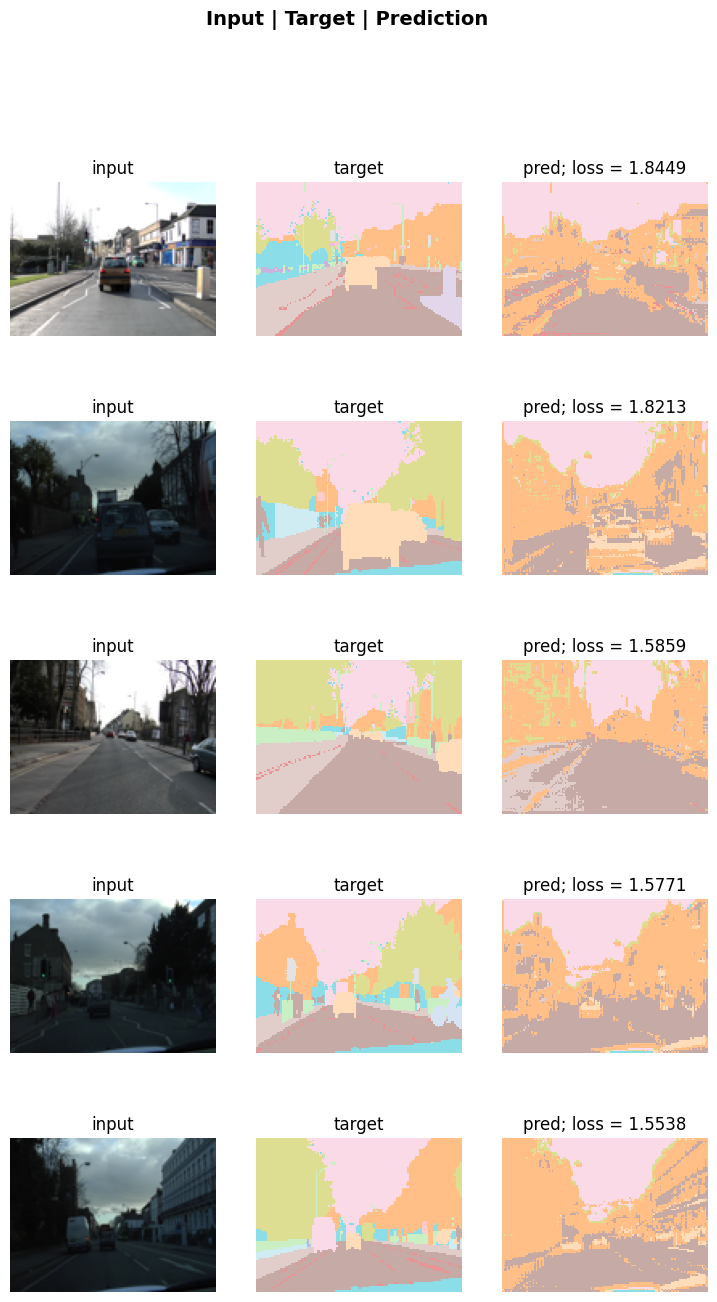

In [29]:
interp = SegmentationInterpretation.from_learner(learn)
interp.plot_top_losses(k=5)

learn.summary

In [53]:
learn.summary

<bound method Learner.summary of <fastai.learner.Learner object at 0x7ff9580c1f60>>

In [54]:
learn.export("streets.pkl")

Path('/home/nex/.fastai/data/camvid_tiny/models/streets.pth')

In [7]:
streets = load_learner("streets.pkl")

FileNotFoundError: [Errno 2] No such file or directory: 'streets'

In [51]:
torch.device("cpu")
torch.cuda.is_available()


True

In [18]:
dl = learn.dls.test_dl(fnames[:5])

In [20]:
preds = learn.get_preds(dl=dl)

In [21]:
preds[0].shape

torch.Size([5, 32, 96, 128])

In [23]:
pred_1 = preds[0][0]

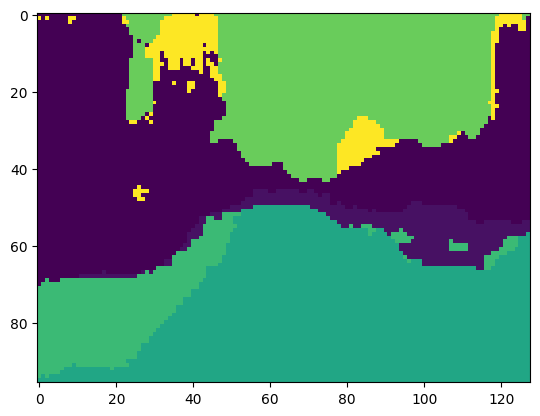

In [24]:
plt.imshow(pred_1.argmax(dim=0))